In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_HY.csv') 

In [5]:
df.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1997-01-31 00:00:00,0.069440,#VALUE!,#VALUE!,0.538337,0.523856,0.552975,0.540099,0.581964,0.567813,0.599813,0.574392,0.555659,0.534345,0.439221,0.405844,0.475692,0.420076,four
1,1997-02-28 00:00:00,0.032326,#VALUE!,#VALUE!,0.645266,0.628310,0.510908,0.501898,0.563598,0.549749,0.559457,0.537504,0.545353,0.531499,0.443249,0.408951,0.467950,0.413271,four
2,1997-03-31 00:00:00,0.045495,#VALUE!,#VALUE!,0.419861,0.435726,0.500652,0.494515,0.538145,0.529193,0.536575,0.515894,0.527484,0.514412,0.446856,0.405322,0.441483,0.382216,four
3,1997-04-30 00:00:00,0.057468,#VALUE!,#VALUE!,0.454503,0.442154,0.556336,0.530701,0.565062,0.551020,0.547063,0.521778,0.550781,0.532880,0.462201,0.419587,0.406354,0.347965,four
4,1997-05-31 00:00:00,0.026339,#VALUE!,#VALUE!,0.624827,0.612519,0.566418,0.540580,0.536349,0.524214,0.552625,0.535758,0.554074,0.535458,0.487060,0.447773,0.412596,0.354794,four


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg)
count,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000
mean,0.351159,0.490379,0.489711,0.495175,0.499683,0.507613,0.505828,0.497147,0.499497,0.507319,0.498248,0.493073,0.484863
std,0.247503,0.235178,0.219736,0.223090,0.225057,0.219753,0.213179,0.207683,0.201386,0.215835,0.219765,0.208462,0.217124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.155043,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000
50%,0.289734,0.512762,0.514750,0.512260,0.523454,0.533540,0.522281,0.512685,0.503557,0.541286,0.537844,0.517038,0.523230
75%,0.489075,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              245 non-null    object 
 1   OAS                               235 non-null    float64
 2   Excess Return % 3-mo (Treasury)   245 non-null    float64
 3   Excess Return % 3-mo (Agg)        245 non-null    float64
 4   Excess Return % 6-mo (Treasury)   245 non-null    float64
 5   Excess Return % 6-mo (Agg)        245 non-null    float64
 6   Excess Return % 9-mo (Treasury)   245 non-null    float64
 7   Excess Return % 9-mo (Agg)        245 non-null    float64
 8   Excess Return % 12-mo (Treasury)  245 non-null    float64
 9   Excess Return % 12-mo (Agg)       245 non-null    float64
 10  Excess Return % 24-mo (Treasury)  245 non-null    float64
 11  Excess Return % 24-mo (Agg)       245 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 80th percentile (top 20%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 80th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.80) # every data point over the 80th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.5437892846000001


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg)
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,0.700950,0.511218,0.504126,0.497930,0.502182,0.484117,0.484329,0.497903,0.504072,0.600373,0.600858,0.631871,0.634599
std,0.110021,0.336153,0.315982,0.323028,0.327070,0.332257,0.323425,0.295593,0.285887,0.244230,0.241743,0.128180,0.127475
min,0.549536,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.305142,0.297485
25%,0.627357,0.257402,0.293053,0.260347,0.241882,0.230937,0.235895,0.225321,0.241563,0.496588,0.501753,0.527780,0.540804
50%,0.682430,0.565665,0.550337,0.474597,0.466855,0.437400,0.439806,0.408501,0.445831,0.619409,0.625000,0.656899,0.652921
75%,0.764442,0.811841,0.785713,0.785584,0.787630,0.805590,0.804428,0.794926,0.776838,0.804647,0.793429,0.713952,0.720912
max,0.973361,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.981908,0.977471,0.954957,0.932568,0.841299,0.851915


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  47.0  0.700950  0.110021  0.016048   
 1  Excess Return % 3-mo (Treasury)  47.0  0.511218  0.336153  0.049033   
 2                         combined  94.0  0.606084  0.266412  0.027478   
 
    95% Conf.  Interval  
 0   0.668646  0.733253  
 1   0.412520  0.609916  
 2   0.551517  0.660650  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...   0.1897
 1                              Degrees of freedom =   92.0000
 2                                               t =    3.6775
 3                           Two side test p value =    0.0004
 4                          Difference < 0 p value =    0.9998
 5                          Difference > 0 p value =    0.0002
 6                                       Cohen's d =    0.7586
 7                                       Hedge's g =    0.7524
 8                        

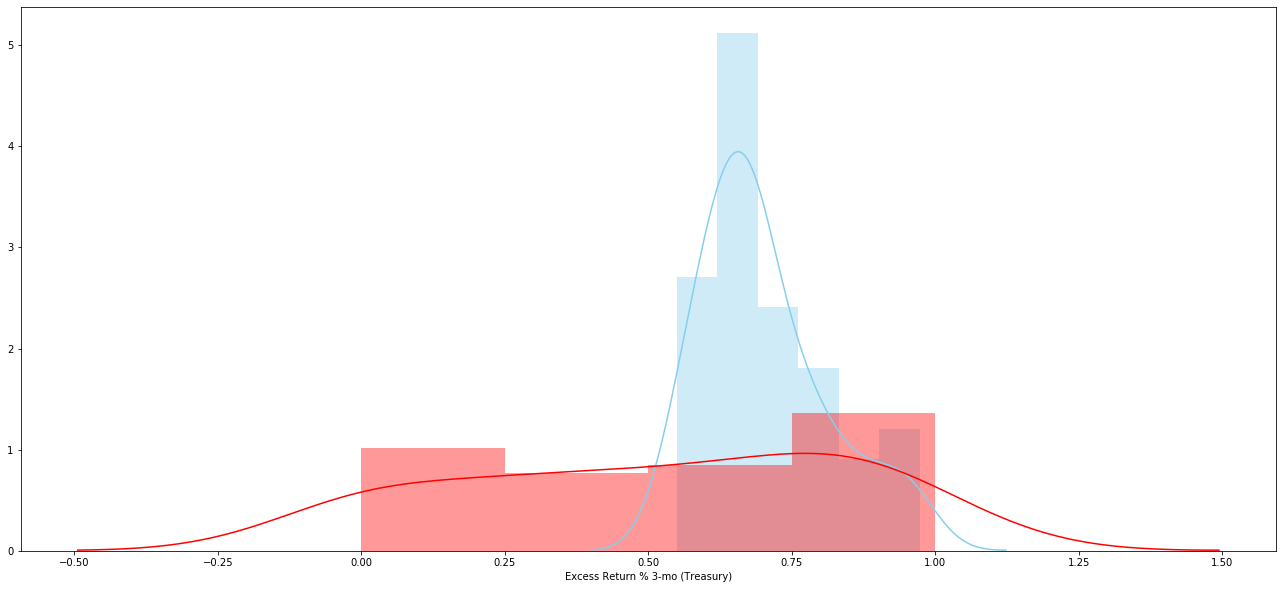

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  47.0  0.700950  0.110021  0.016048   0.668646   
 1  Excess Return % 3-mo (Agg)  47.0  0.504126  0.315982  0.046091   0.411351   
 2                    combined  94.0  0.602538  0.255268  0.026329   0.550254   
 
    Interval  
 0  0.733253  
 1  0.596902  
 2  0.654822  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =    0.1968
 1                             Degrees of freedom =   92.0000
 2                                              t =    4.0329
 3                          Two side test p value =    0.0001
 4                         Difference < 0 p value =    0.9999
 5                         Difference > 0 p value =    0.0001
 6                                      Cohen's d =    0.8319
 7                                      Hedge's g =    0.8251
 8                                  Glass's delta =    

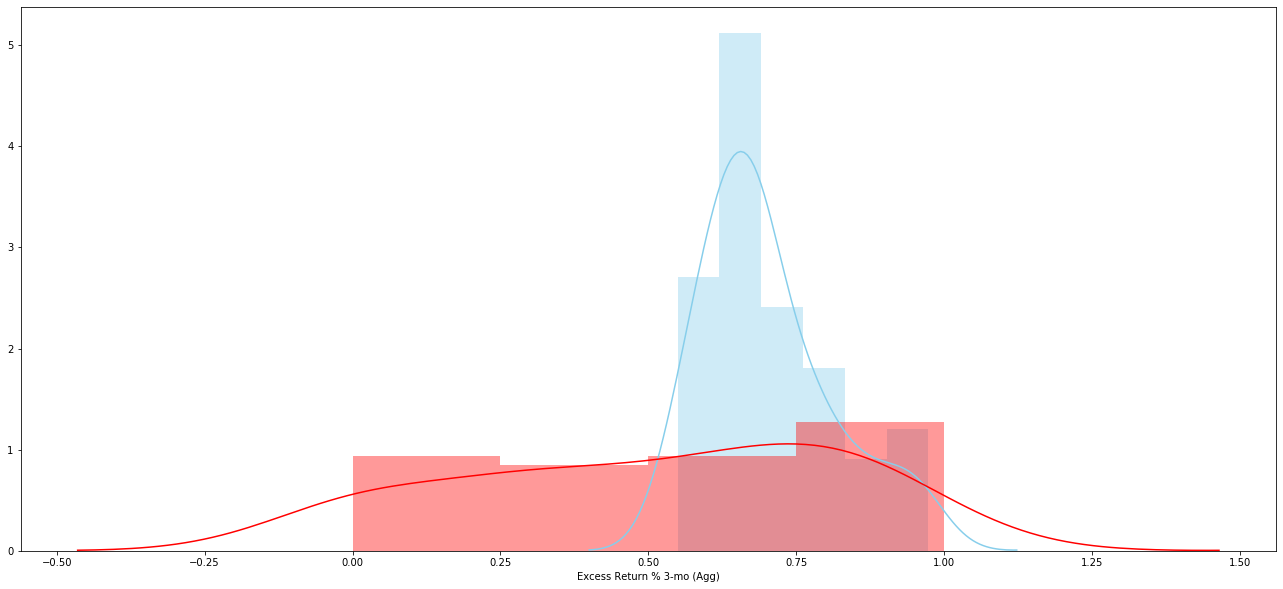

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable     N     Mean        SD        SE  \
 0                              OAS  47.0  0.70095  0.110021  0.016048   
 1  Excess Return % 6-mo (Treasury)  47.0  0.49793  0.323028  0.047118   
 2                         combined  94.0  0.59944  0.260796  0.026899   
 
    95% Conf.  Interval  
 0   0.668646  0.733253  
 1   0.403086  0.592775  
 2   0.546024  0.652856  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...   0.2030
 1                              Degrees of freedom =   92.0000
 2                                               t =    4.0786
 3                           Two side test p value =    0.0001
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    0.8414
 7                                       Hedge's g =    0.8345
 8                            

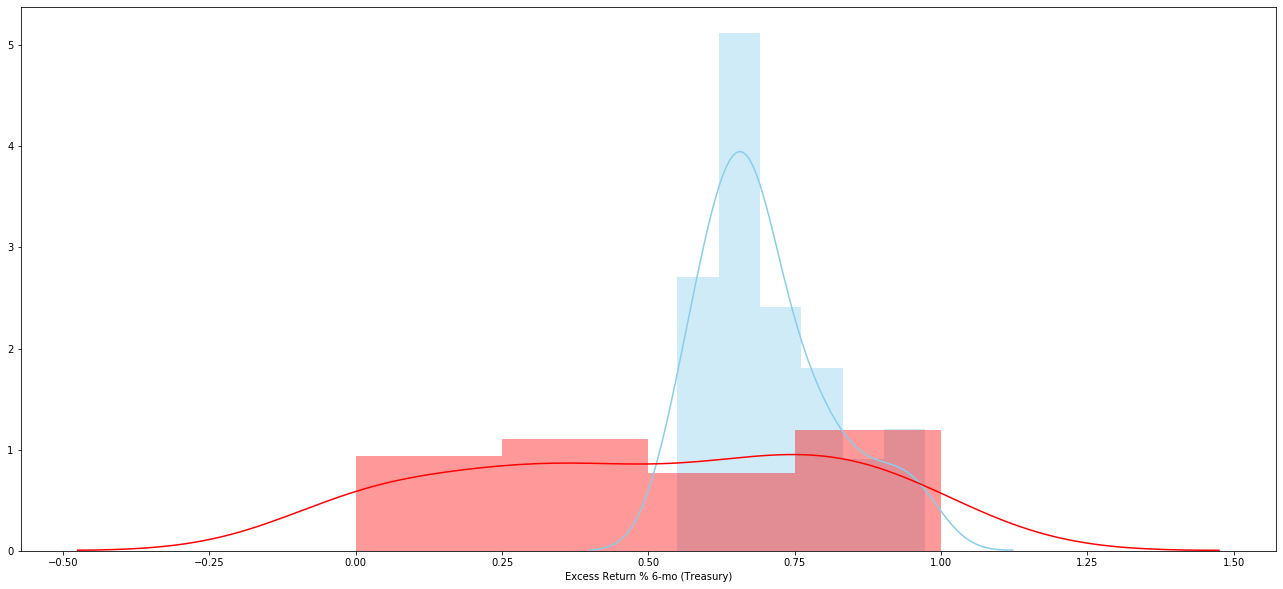

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  47.0  0.700950  0.110021  0.016048   0.668646   
 1  Excess Return % 6-mo (Agg)  47.0  0.502182  0.327070  0.047708   0.406151   
 2                    combined  94.0  0.601566  0.262455  0.027070   0.547810   
 
    Interval  
 0  0.733253  
 1  0.598213  
 2  0.655322  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =    0.1988
 1                             Degrees of freedom =   92.0000
 2                                              t =    3.9489
 3                          Two side test p value =    0.0002
 4                         Difference < 0 p value =    0.9999
 5                         Difference > 0 p value =    0.0001
 6                                      Cohen's d =    0.8146
 7                                      Hedge's g =    0.8079
 8                                  Glass's delta =    

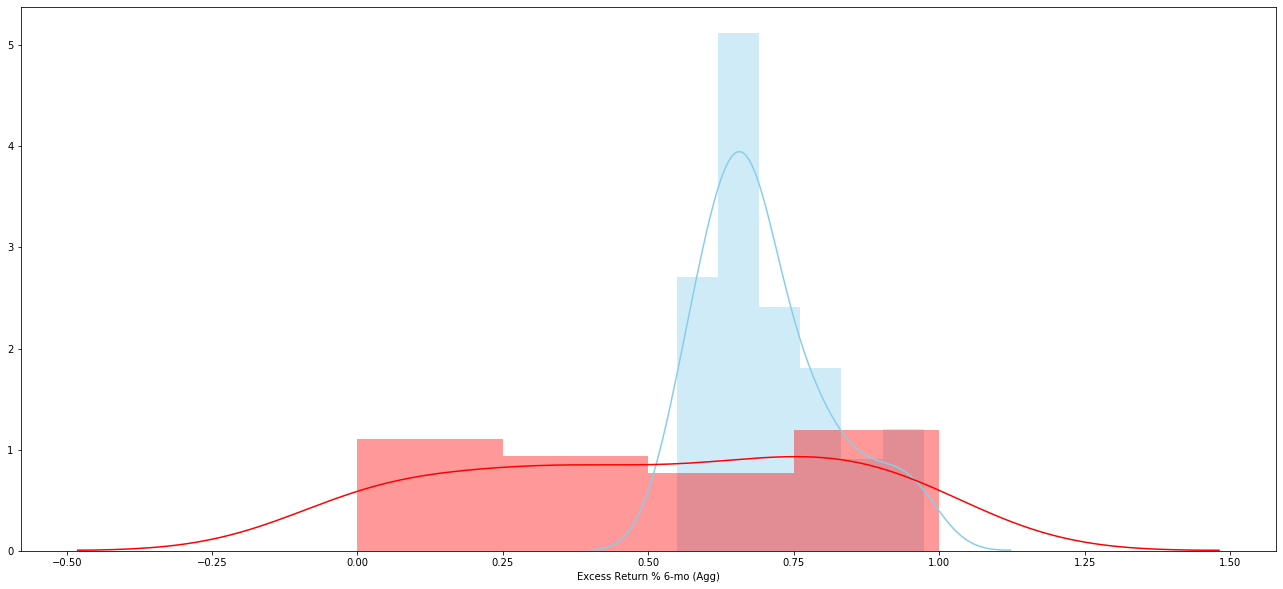

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  47.0  0.700950  0.110021  0.016048   
 1  Excess Return % 9-mo (Treasury)  47.0  0.484117  0.332257  0.048465   
 2                         combined  94.0  0.592533  0.269205  0.027766   
 
    95% Conf.  Interval  
 0   0.668646  0.733253  
 1   0.386563  0.581671  
 2   0.537395  0.647672  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...   0.2168
 1                              Degrees of freedom =   92.0000
 2                                               t =    4.2472
 3                           Two side test p value =    0.0001
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    0.8761
 7                                       Hedge's g =    0.8690
 8                        

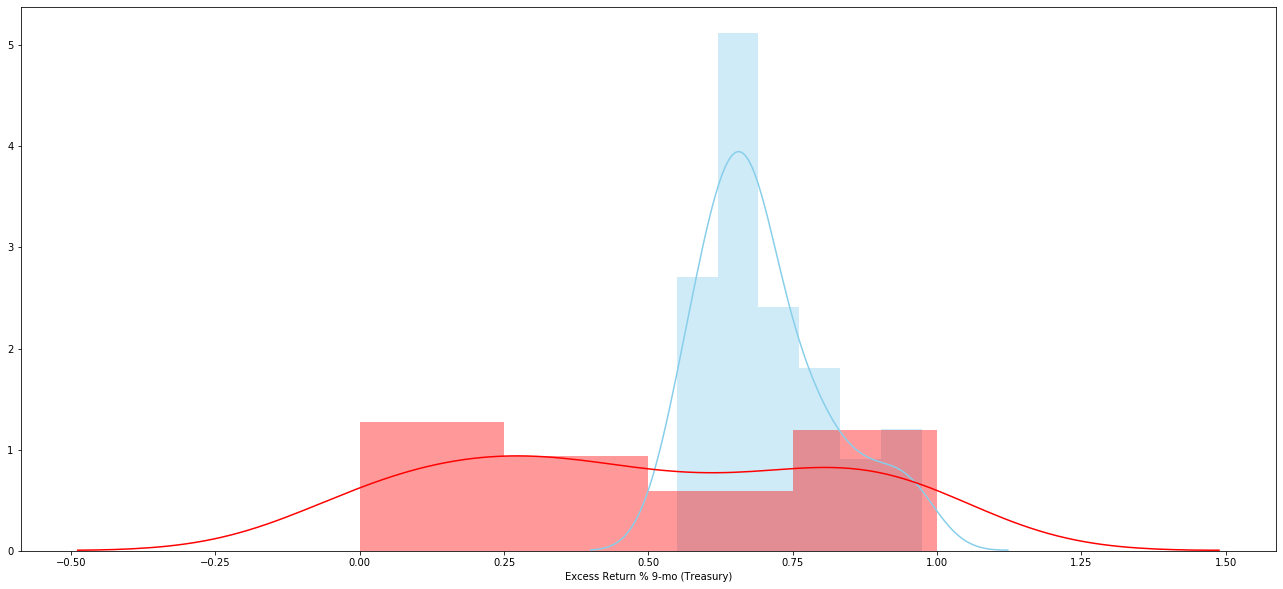

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  47.0  0.700950  0.110021  0.016048   0.668646   
 1  Excess Return % 9-mo (Agg)  47.0  0.484329  0.323425  0.047176   0.389368   
 2                    combined  94.0  0.592639  0.263787  0.027208   0.538610   
 
    Interval  
 0  0.733253  
 1  0.579290  
 2  0.646668  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =    0.2166
 1                             Degrees of freedom =   92.0000
 2                                              t =    4.3471
 3                          Two side test p value =    0.0000
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    0.8967
 7                                      Hedge's g =    0.8894
 8                                  Glass's delta =    

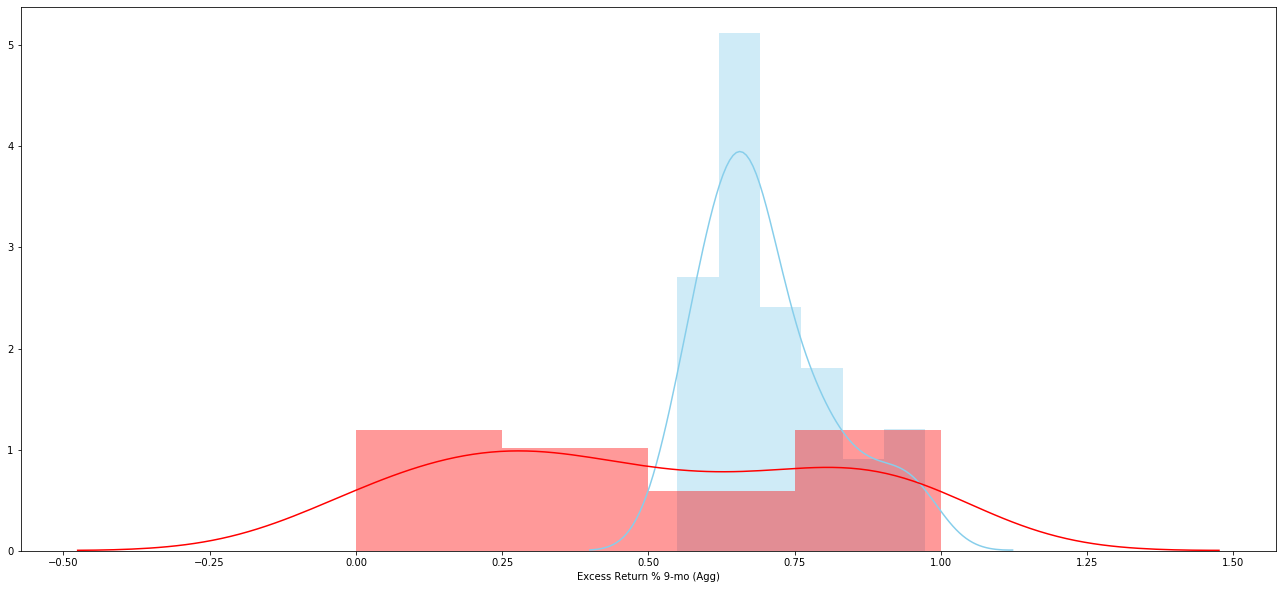

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  47.0  0.700950  0.110021  0.016048   
 1  Excess Return % 12-mo (Treasury)  47.0  0.497903  0.295593  0.043117   
 2                          combined  94.0  0.599426  0.244178  0.025185   
 
    95% Conf.  Interval  
 0   0.668646  0.733253  
 1   0.411114  0.584693  
 2   0.549414  0.649439  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Treas...   0.2030
 1                              Degrees of freedom =   92.0000
 2                                               t =    4.4134
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    0.9104
 7                                       Hedge's g =    0.9030
 8                    

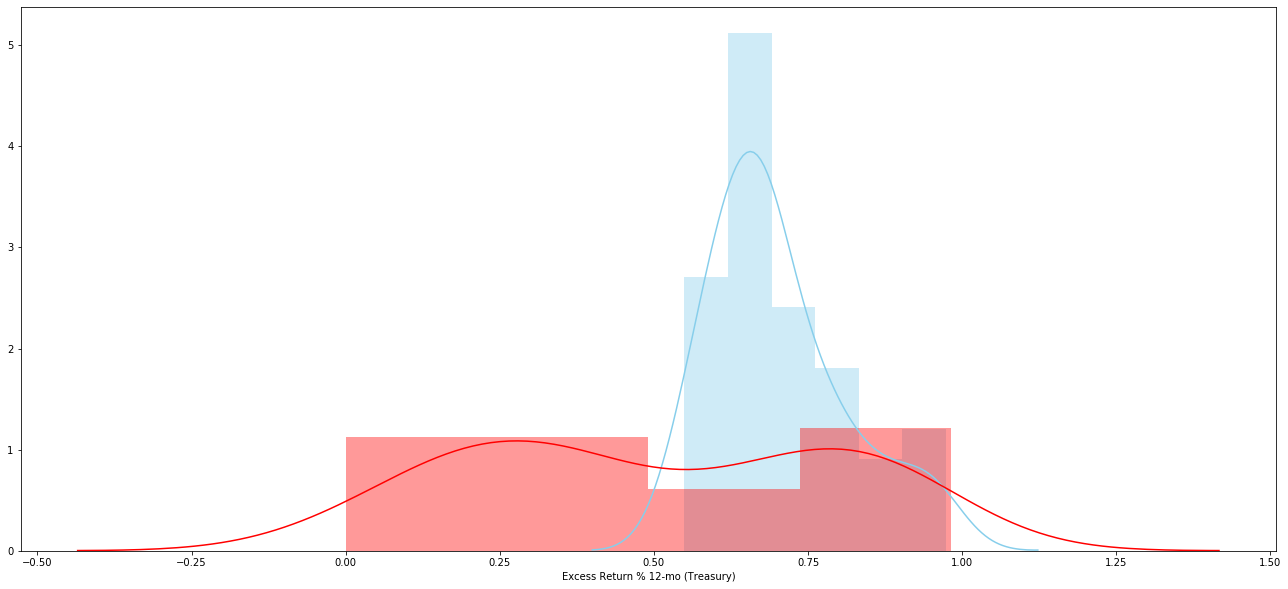

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  47.0  0.700950  0.110021  0.016048   0.668646   
 1  Excess Return % 12-mo (Agg)  47.0  0.504072  0.285887  0.041701   0.420132   
 2                     combined  94.0  0.602511  0.237082  0.024453   0.553952   
 
    Interval  
 0  0.733253  
 1  0.588011  
 2  0.651070  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =    0.1969
 1                              Degrees of freedom =   92.0000
 2                                               t =    4.4062
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    0.9089
 7                                       Hedge's g =    0.9015
 8                                   Glass

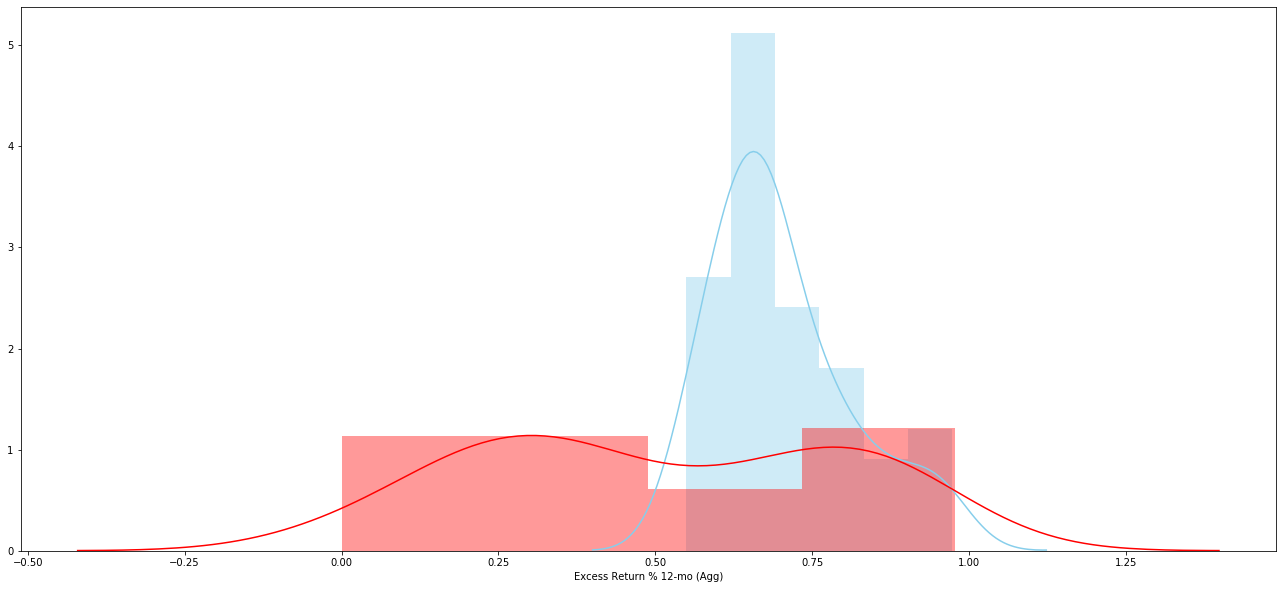

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  47.0  0.700950  0.110021  0.016048   
 1  Excess Return % 24-mo (Treasury)  47.0  0.600373  0.244230  0.035625   
 2                          combined  94.0  0.650661  0.195055  0.020118   
 
    95% Conf.  Interval  
 0   0.668646  0.733253  
 1   0.528665  0.672082  
 2   0.610710  0.690613  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Treas...   0.1006
 1                              Degrees of freedom =   92.0000
 2                                               t =    2.5741
 3                           Two side test p value =    0.0116
 4                          Difference < 0 p value =    0.9942
 5                          Difference > 0 p value =    0.0058
 6                                       Cohen's d =    0.5310
 7                                       Hedge's g =    0.5267
 8                    

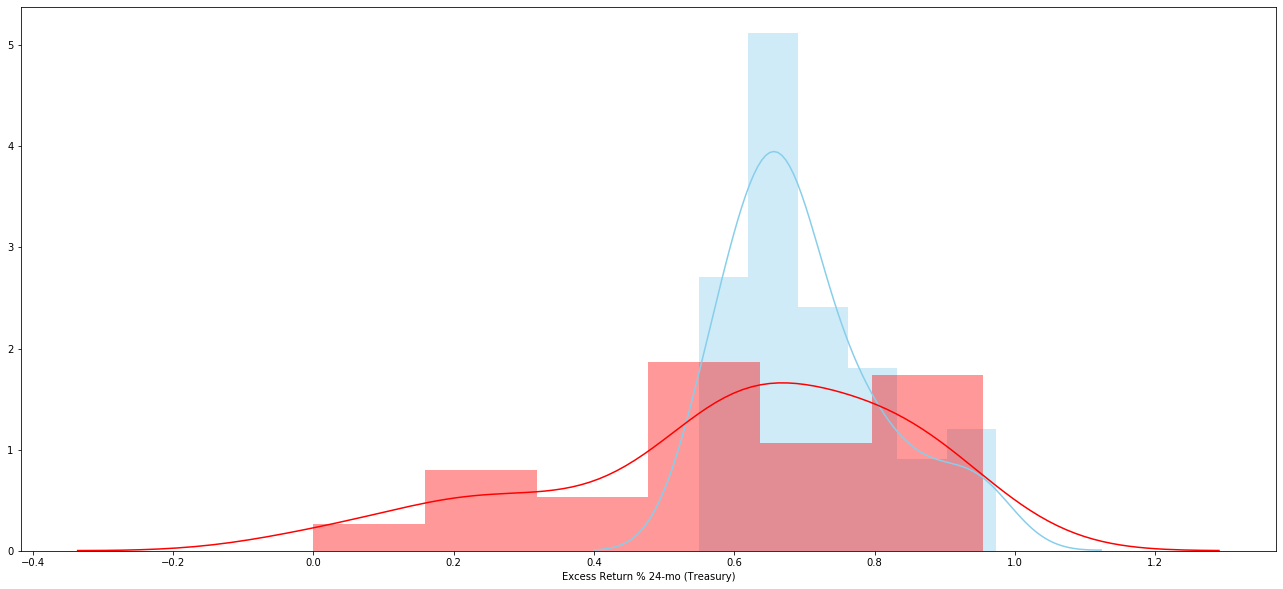

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  47.0  0.700950  0.110021  0.016048   0.668646   
 1  Excess Return % 24-mo (Agg)  47.0  0.600858  0.241743  0.035262   0.529880   
 2                     combined  94.0  0.650904  0.193454  0.019953   0.611281   
 
    Interval  
 0  0.733253  
 1  0.671836  
 2  0.690527  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =    0.1001
 1                              Degrees of freedom =   92.0000
 2                                               t =    2.5835
 3                           Two side test p value =    0.0114
 4                          Difference < 0 p value =    0.9943
 5                          Difference > 0 p value =    0.0057
 6                                       Cohen's d =    0.5329
 7                                       Hedge's g =    0.5286
 8                                   Glass

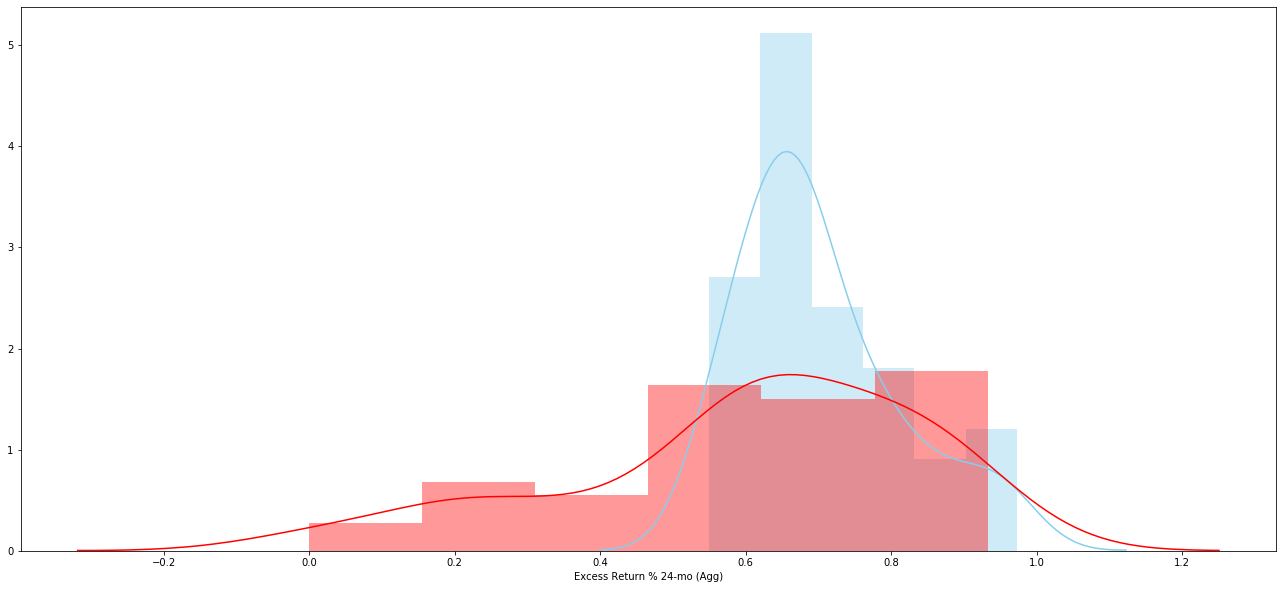

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  47.0  0.700950  0.110021  0.016048   
 1  Excess Return % 36-mo (Treasury)  47.0  0.631871  0.128180  0.018697   
 2                          combined  94.0  0.666410  0.123773  0.012766   
 
    95% Conf.  Interval  
 0   0.668646  0.733253  
 1   0.594236  0.669506  
 2   0.641059  0.691761  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Treas...   0.0691
 1                              Degrees of freedom =   92.0000
 2                                               t =    2.8035
 3                           Two side test p value =    0.0062
 4                          Difference < 0 p value =    0.9969
 5                          Difference > 0 p value =    0.0031
 6                                       Cohen's d =    0.5783
 7                                       Hedge's g =    0.5736
 8                    

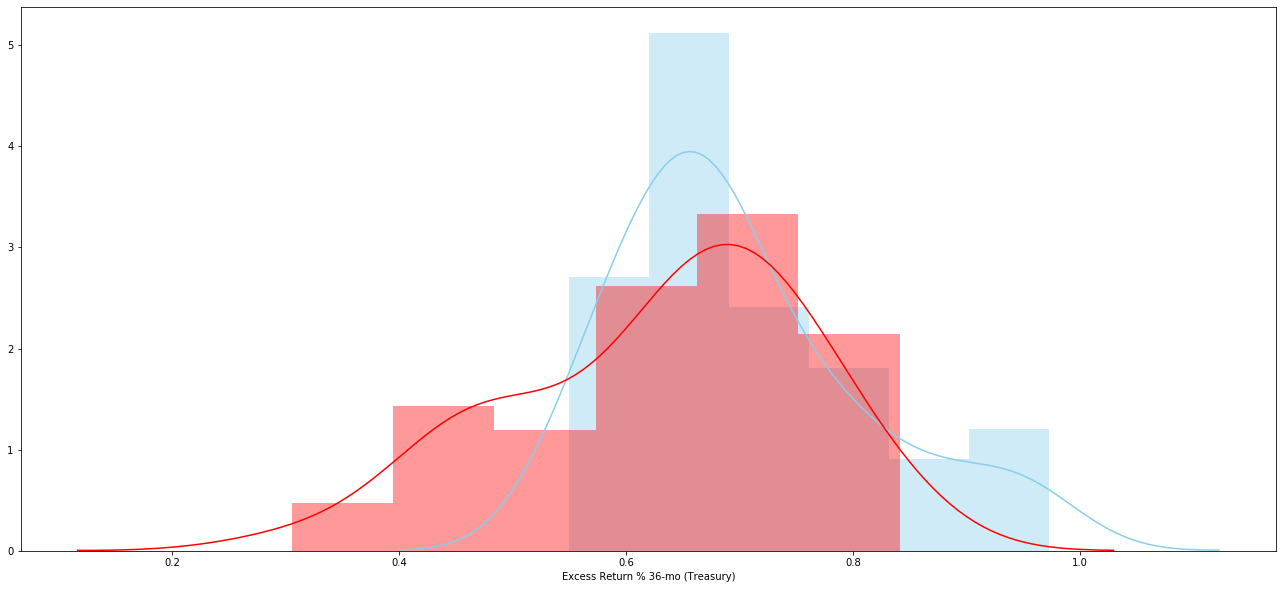

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  47.0  0.700950  0.110021  0.016048   0.668646   
 1  Excess Return % 36-mo (Agg)  47.0  0.634599  0.127475  0.018594   0.597171   
 2                     combined  94.0  0.667774  0.123033  0.012690   0.642575   
 
    Interval  
 0  0.733253  
 1  0.672027  
 2  0.692974  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =    0.0664
 1                              Degrees of freedom =   92.0000
 2                                               t =    2.7013
 3                           Two side test p value =    0.0082
 4                          Difference < 0 p value =    0.9959
 5                          Difference > 0 p value =    0.0041
 6                                       Cohen's d =    0.5572
 7                                       Hedge's g =    0.5527
 8                                   Glass

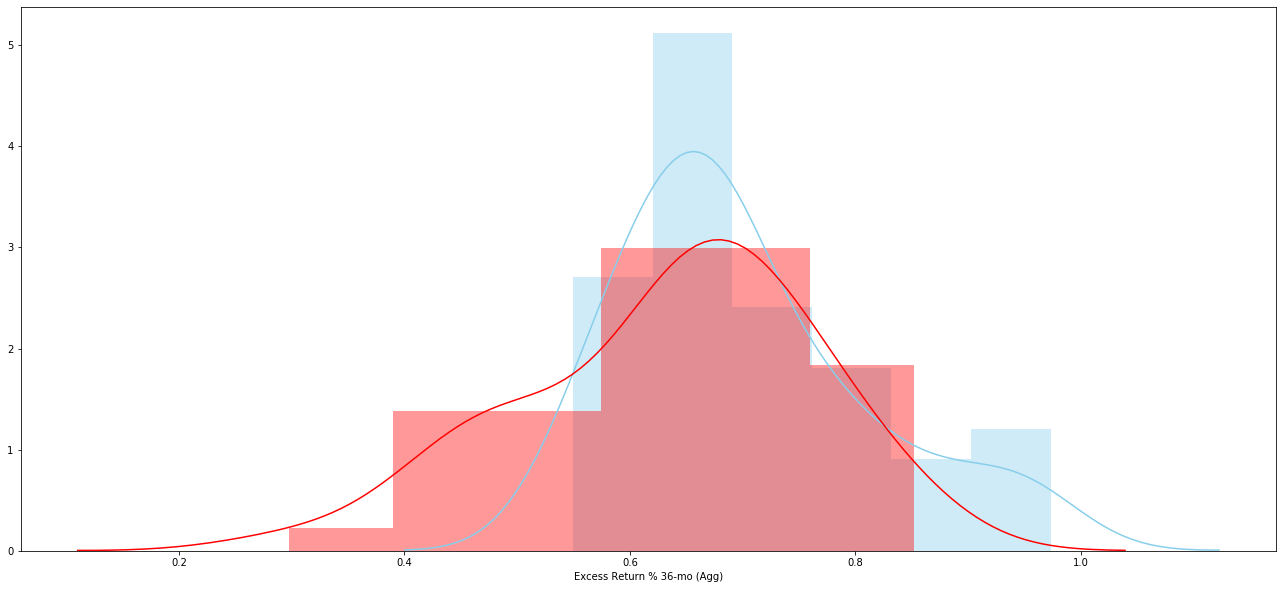

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_HY.csv') 

In [36]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg)
count,279.000000,279.000000,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000
mean,0.351159,0.492857,0.494827,0.490379,0.489711,0.495175,0.499683,0.507613,0.505828,0.497147,0.499497,0.507319,0.498248,0.493073,0.484863
std,0.247503,0.237344,0.233785,0.235178,0.219736,0.223090,0.225057,0.219753,0.213179,0.207683,0.201386,0.215835,0.219765,0.208462,0.217124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.155043,0.371940,0.372569,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000
50%,0.289734,0.500462,0.504350,0.512762,0.514750,0.512260,0.523454,0.533540,0.522281,0.512685,0.503557,0.541286,0.537844,0.517038,0.523230
75%,0.489075,0.624134,0.622223,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   47.0  0.700950  0.110021  0.016048   
 1  Excess Return % 3-mo (Treasury)  278.0  0.490379  0.235178  0.014105   
 2                         combined  325.0  0.520831  0.233465  0.012950   
 
    95% Conf.  Interval  
 0   0.668646  0.733253  
 1   0.462612  0.518146  
 2   0.495354  0.546308  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.2106
 1                              Degrees of freedom =   323.0000
 2                                               t =     6.0220
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.9498
 7                                       Hedge's g =     0.9475
 8           

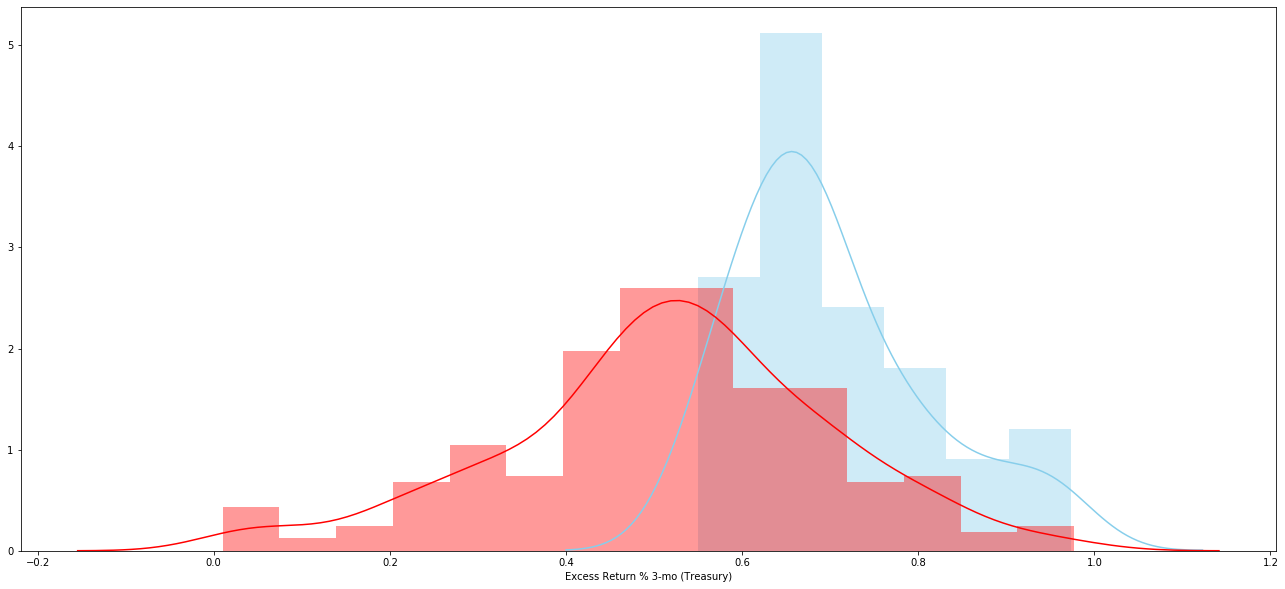

In [38]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   47.0  0.700950  0.110021  0.016048   0.668646   
 1  Excess Return % 3-mo (Agg)  278.0  0.489711  0.219736  0.013179   0.463767   
 2                    combined  325.0  0.520259  0.220307  0.012220   0.496218   
 
    Interval  
 0  0.733253  
 1  0.515654  
 2  0.544300  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.2112
 1                             Degrees of freedom =   323.0000
 2                                              t =     6.4492
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.0171
 7                                      Hedge's g =     1.0148
 8                                  Glass'

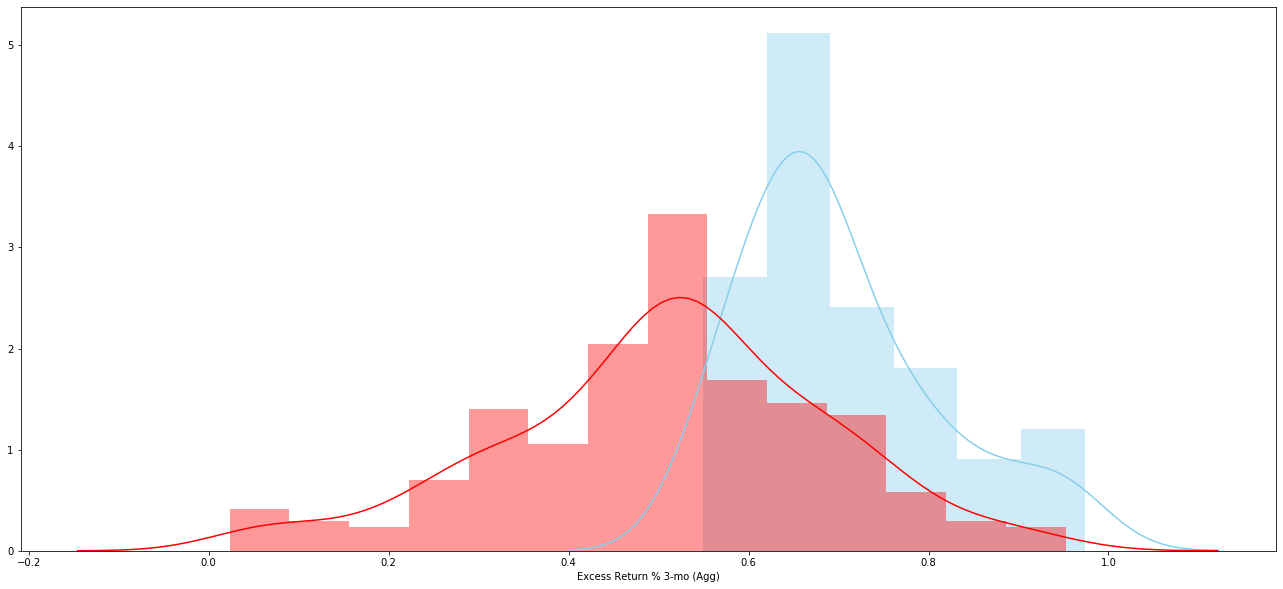

In [40]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   47.0  0.700950  0.110021  0.016048   
 1  Excess Return % 6-mo (Treasury)  275.0  0.495175  0.223090  0.013453   
 2                         combined  322.0  0.525211  0.222512  0.012400   
 
    95% Conf.  Interval  
 0   0.668646  0.733253  
 1   0.468691  0.521659  
 2   0.500815  0.549606  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.2058
 1                              Degrees of freedom =   320.0000
 2                                               t =     6.1902
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.9771
 7                                       Hedge's g =     0.9748
 8           

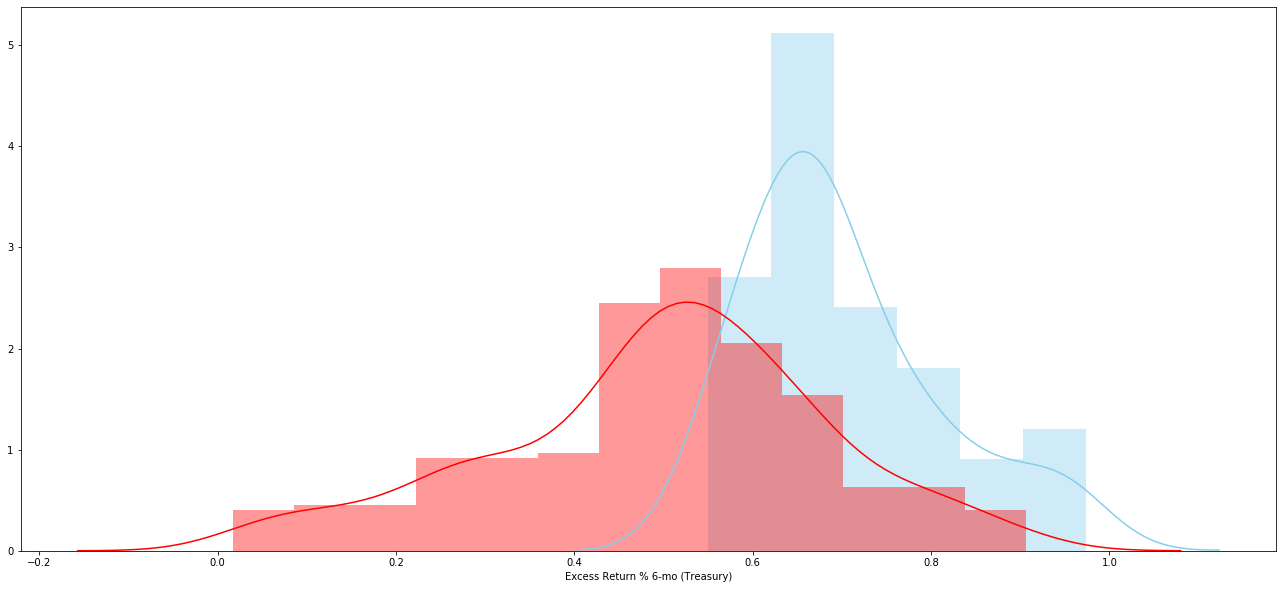

In [42]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   47.0  0.700950  0.110021  0.016048   0.668646   
 1  Excess Return % 6-mo (Agg)  275.0  0.499683  0.225057  0.013571   0.472965   
 2                    combined  322.0  0.529060  0.223684  0.012465   0.504536   
 
    Interval  
 0  0.733253  
 1  0.526400  
 2  0.553584  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.2013
 1                             Degrees of freedom =   320.0000
 2                                              t =     6.0038
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     0.9476
 7                                      Hedge's g =     0.9454
 8                                  Glass'

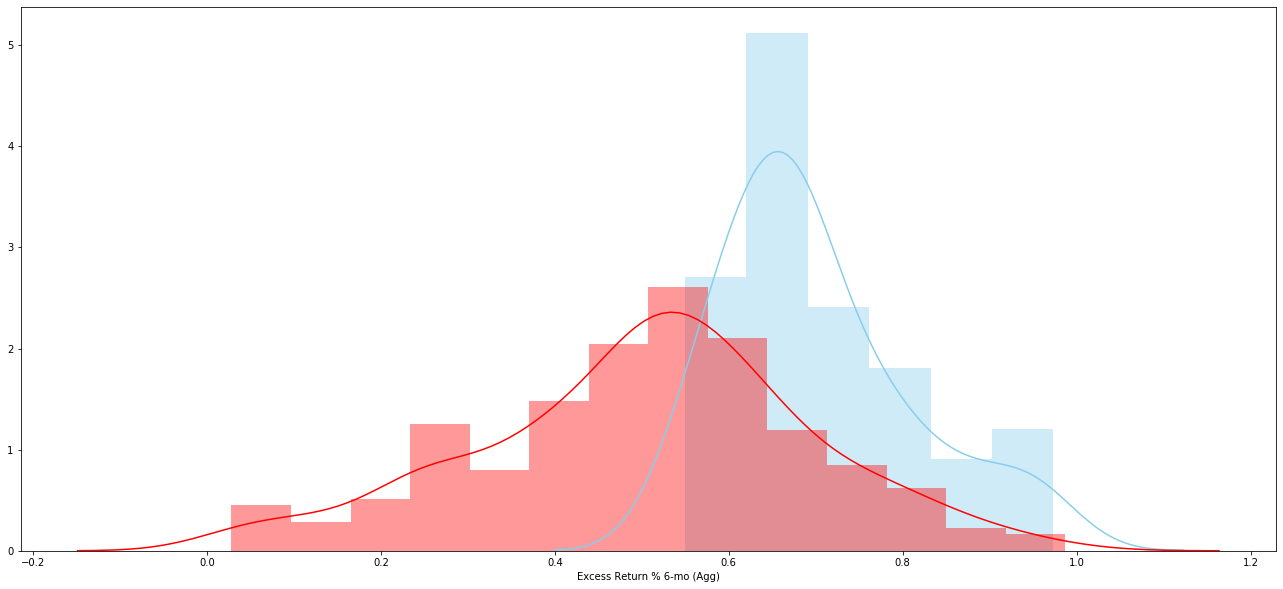

In [44]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   47.0  0.700950  0.110021  0.016048   
 1  Excess Return % 9-mo (Treasury)  272.0  0.507613  0.219753  0.013325   
 2                         combined  319.0  0.536098  0.218210  0.012217   
 
    95% Conf.  Interval  
 0   0.668646  0.733253  
 1   0.481380  0.533846  
 2   0.512061  0.560136  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.1933
 1                              Degrees of freedom =   317.0000
 2                                               t =     5.8995
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.9319
 7                                       Hedge's g =     0.9297
 8           

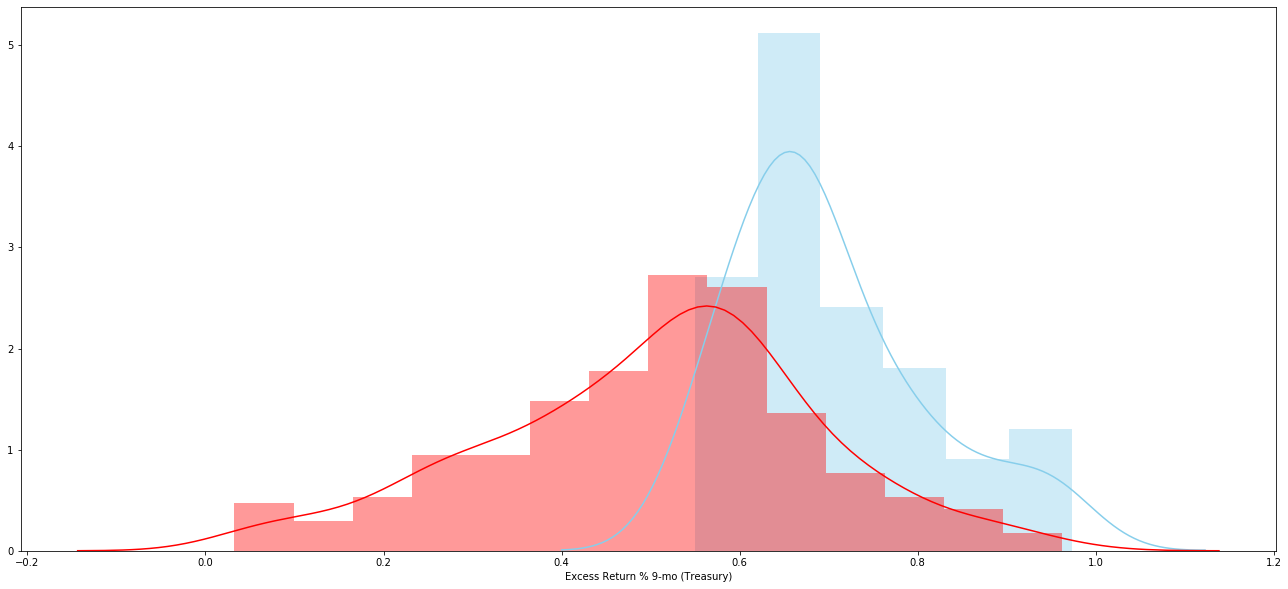

In [46]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   47.0  0.700950  0.110021  0.016048   0.668646   
 1  Excess Return % 9-mo (Agg)  272.0  0.505828  0.213179  0.012926   0.480380   
 2                    combined  319.0  0.534576  0.212785  0.011914   0.511137   
 
    Interval  
 0  0.733253  
 1  0.531276  
 2  0.558016  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.1951
 1                             Degrees of freedom =   317.0000
 2                                              t =     6.1297
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     0.9683
 7                                      Hedge's g =     0.9660
 8                                  Glass'

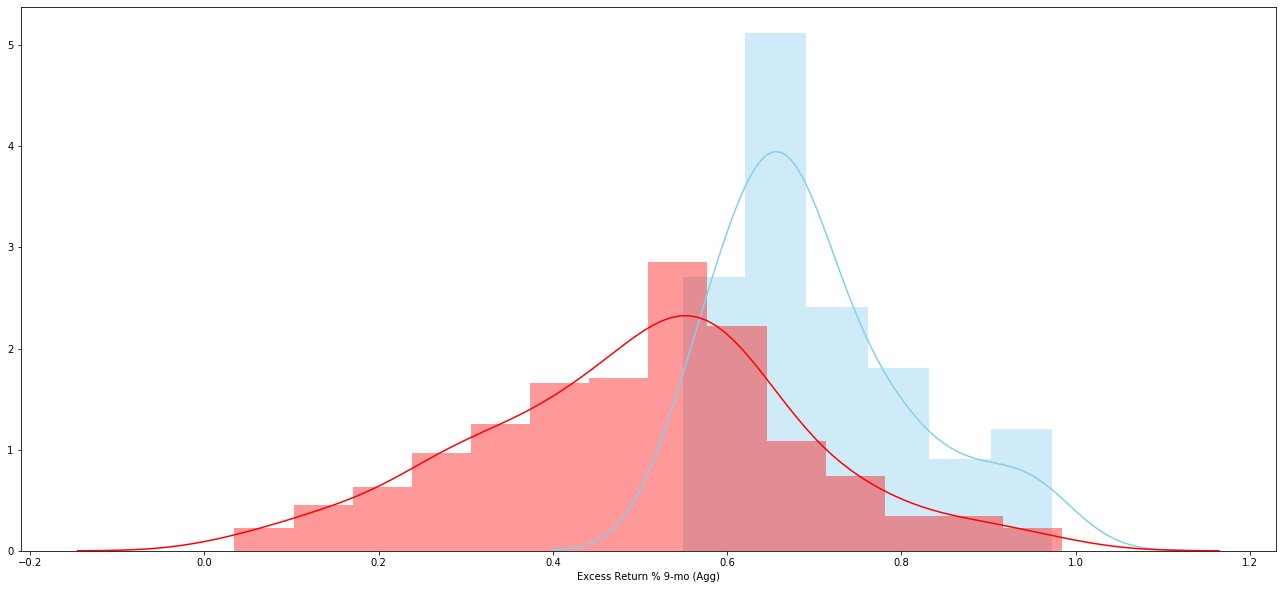

In [48]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   47.0  0.700950  0.110021  0.016048   
 1  Excess Return % 12-mo (Treasury)  269.0  0.497147  0.207683  0.012663   
 2                          combined  316.0  0.527460  0.209141  0.011765   
 
    95% Conf.  Interval  
 0   0.668646  0.733253  
 1   0.472216  0.522078  
 2   0.504311  0.550608  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.2038
 1                              Degrees of freedom =   314.0000
 2                                               t =     6.5625
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.0375
 7                                       Hedge's g =     1.0350
 8       

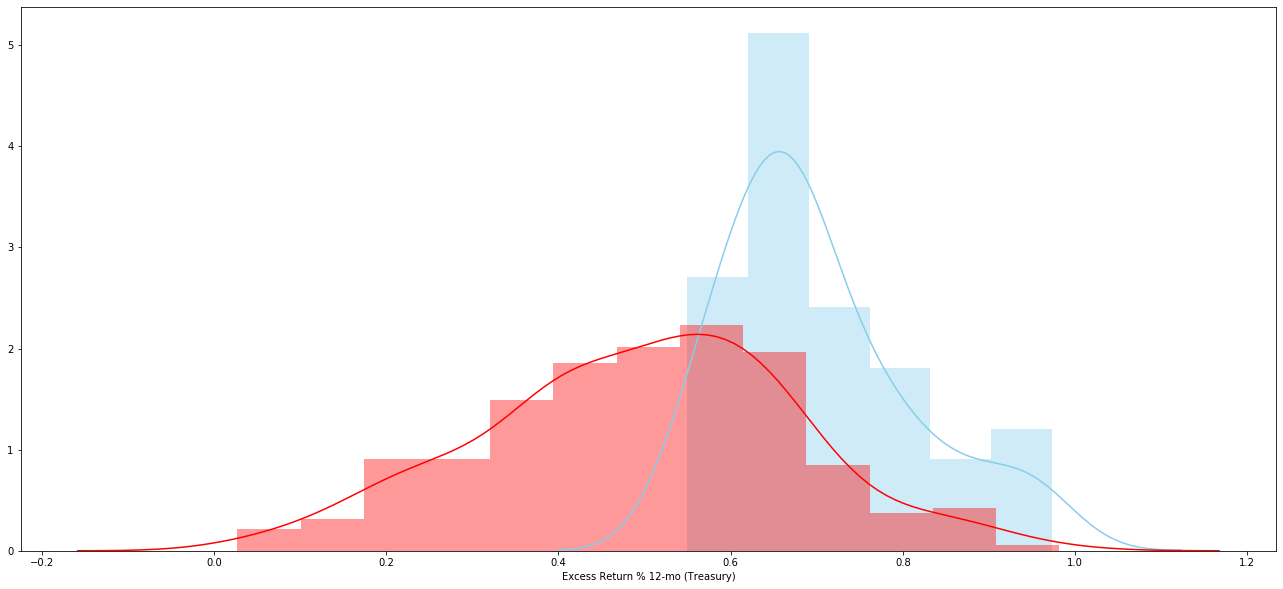

In [50]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   47.0  0.700950  0.110021  0.016048   
 1  Excess Return % 12-mo (Agg)  269.0  0.499497  0.201386  0.012279   
 2                     combined  316.0  0.529459  0.203537  0.011450   
 
    95% Conf.  Interval  
 0   0.668646  0.733253  
 1   0.475322  0.523672  
 2   0.506932  0.551987  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.2015
 1                              Degrees of freedom =   314.0000
 2                                               t =     6.6800
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.0561
 7                                       Hedge's g =     1.0535
 8                           

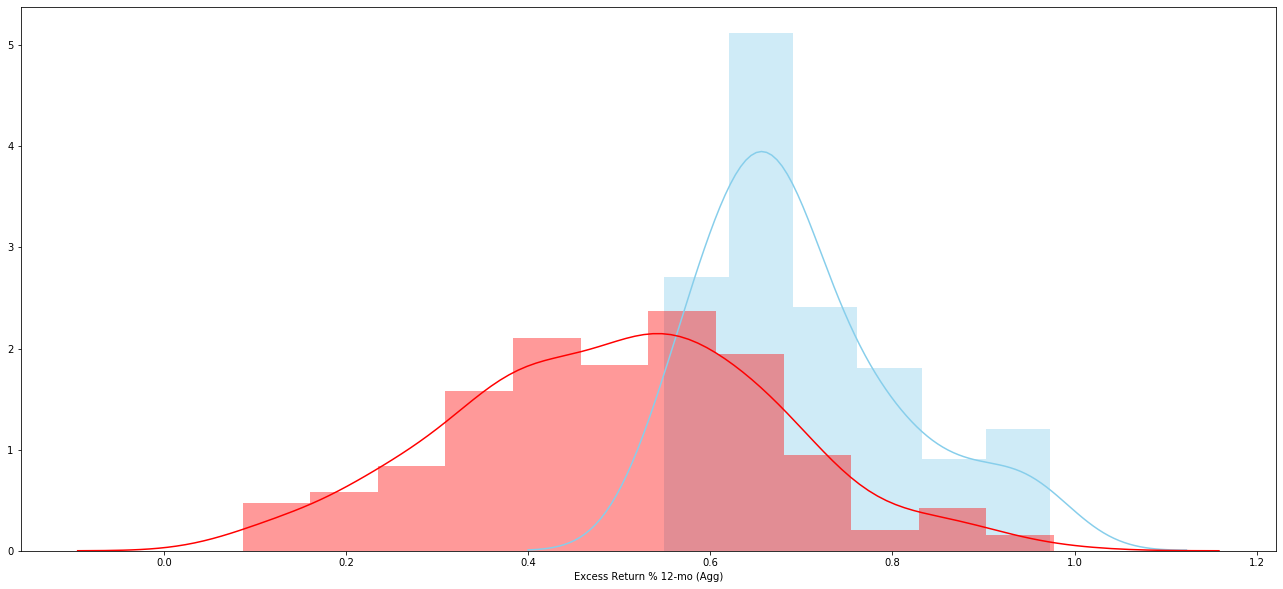

In [52]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   47.0  0.700950  0.110021  0.016048   
 1  Excess Return % 24-mo (Treasury)  257.0  0.507319  0.215835  0.013463   
 2                          combined  304.0  0.537255  0.214740  0.012316   
 
    95% Conf.  Interval  
 0   0.668646  0.733253  
 1   0.480806  0.533832  
 2   0.513019  0.561491  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.1936
 1                              Degrees of freedom =   302.0000
 2                                               t =     6.0035
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.9524
 7                                       Hedge's g =     0.9500
 8       

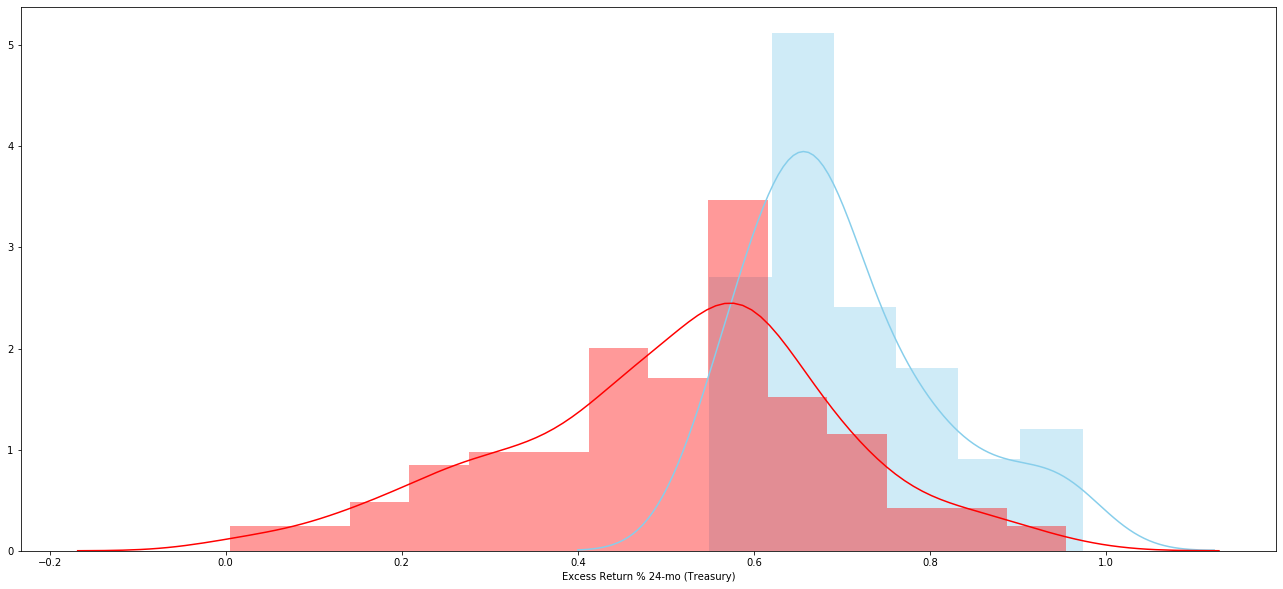

In [54]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   47.0  0.700950  0.110021  0.016048   
 1  Excess Return % 24-mo (Agg)  257.0  0.498248  0.219765  0.013709   
 2                     combined  304.0  0.529587  0.219159  0.012570   
 
    95% Conf.  Interval  
 0   0.668646  0.733253  
 1   0.471252  0.525244  
 2   0.504852  0.554322  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.2027
 1                              Degrees of freedom =   302.0000
 2                                               t =     6.1772
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.9800
 7                                       Hedge's g =     0.9775
 8                           

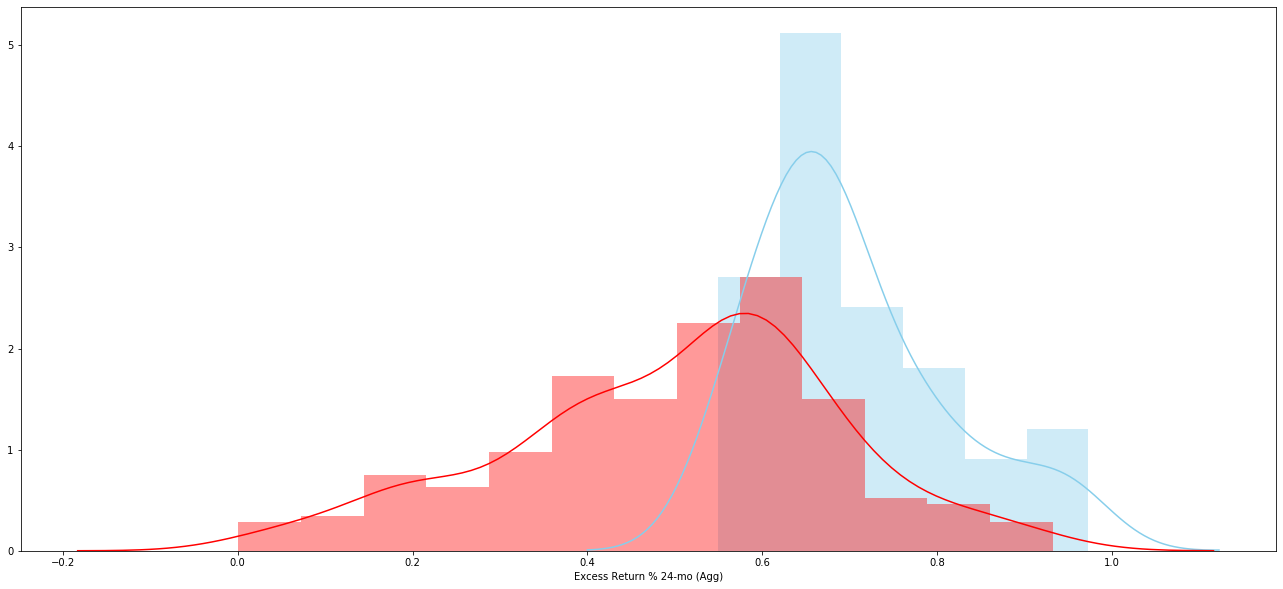

In [56]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   47.0  0.700950  0.110021  0.016048   
 1  Excess Return % 36-mo (Treasury)  245.0  0.493073  0.208462  0.013318   
 2                          combined  292.0  0.526532  0.210255  0.012304   
 
    95% Conf.  Interval  
 0   0.668646  0.733253  
 1   0.466840  0.519306  
 2   0.502316  0.550749  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.2079
 1                              Degrees of freedom =   290.0000
 2                                               t =     6.6544
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.0597
 7                                       Hedge's g =     1.0569
 8       

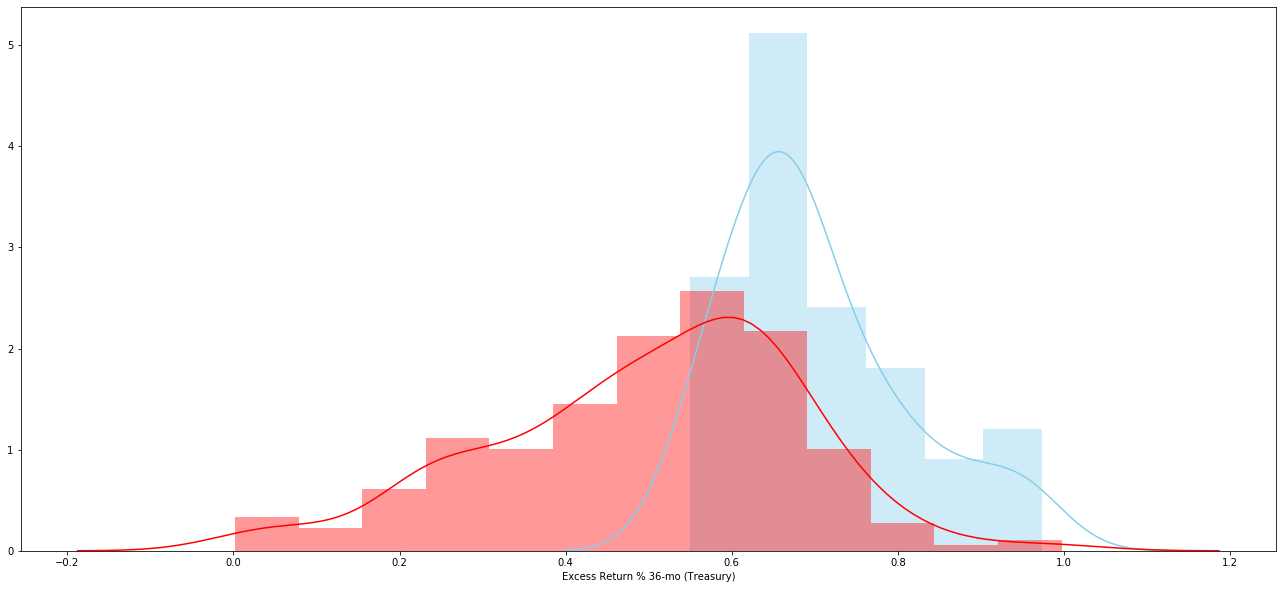

In [58]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   47.0  0.700950  0.110021  0.016048   
 1  Excess Return % 36-mo (Agg)  245.0  0.484863  0.217124  0.013872   
 2                     combined  292.0  0.519644  0.218563  0.012790   
 
    95% Conf.  Interval  
 0   0.668646  0.733253  
 1   0.457540  0.512186  
 2   0.494470  0.544817  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.2161
 1                              Degrees of freedom =   290.0000
 2                                               t =     6.6543
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.0596
 7                                       Hedge's g =     1.0569
 8                           

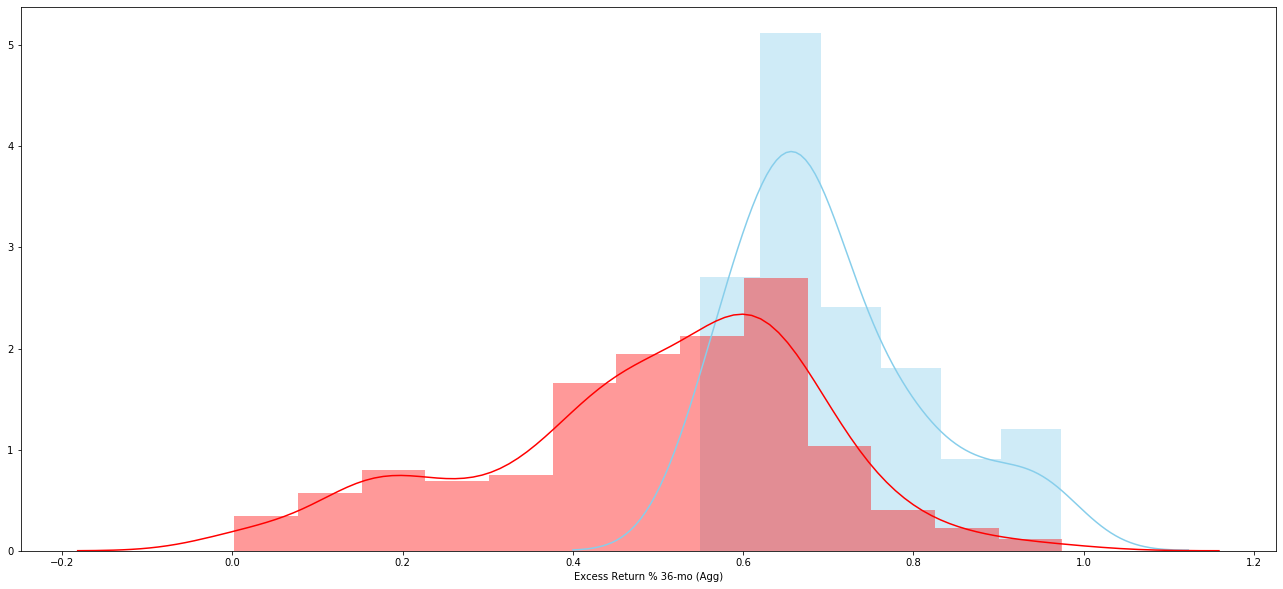

In [60]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")